# Análise de Dados do Airbnb - Toronto (CA)

</br>

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Maior empresa de hotelaria que **não possui nenhum hotel**.

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.
</br>
</br>

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>
</br>
**Neste *notebook*, iremos analisar os dados referentes à cidade de Toronto, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Toronto (good for visualisations).*

#### Importar os pacotes necessários

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

#### Importa o arquivo listings.csv para um DataFrame

In [2]:
df = pd.read_csv('http://data.insideairbnb.com/canada/on/toronto/2021-08-06/visualisations/listings.csv')

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - número de reviews 'ltm'
* `license` - licensa da propriedade

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64617,-79.42451,Entire home/apt,469,28,7,2017-12-04,0.09,1,0,0,NaN
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64105,-79.37628,Private room,94,180,169,2013-08-27,1.56,2,365,0,NaN
2,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69602,-79.45468,Private room,72,28,217,2018-10-10,1.79,2,365,0,NaN
3,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,NaN,Greenwood-Coxwell,43.66890,-79.32592,Entire home/apt,45,365,26,2011-06-25,0.21,1,159,0,NaN
4,28160,"Safe, Central, Quiet and Great Amenities!",86838,Rita,NaN,Mount Pleasant West,43.69958,-79.38814,Entire home/apt,75,30,7,2018-10-17,0.10,1,345,0,NaN


### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui?**
### **Quais os tipos das variáveis?**
### **Qual a porcentagem de valores ausentes no *dataset*?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa (`listings.csv.gz`).

In [4]:
def eda(df):
    """
    Gera uma dataframe com informações relevantes sobre o mesmo.
    Generates a dataframe with relevant information about it
    
    :param df: pd.DataFrame para ser realizada a exploração
    :param df: pd.DataFrameto be explored
    """
    
    explorar = pd.DataFrame({
        'tipo' : df.dtypes,
        'quantidade_nula' : df.isnull().sum()
    })
    
    explorar['porcentagem_nula'] = np.round((explorar.quantidade_nula / df.shape[0]) * 100, 4)
    
    display(f'Entradas: {df.shape[0]}')
    display(f'Variáveis: {df.shape[1]}')
    
    return explorar.sort_values(by='quantidade_nula', ascending=False)

In [5]:
eda(df)

'Entradas: 15084'

'Variáveis: 18'

,tipo,quantidade_nula,porcentagem_nula
neighbourhood_group,float64,15084,100.0000
license,object,10714,71.0289
reviews_per_month,float64,3475,23.0377
last_review,object,3475,23.0377
host_name,object,7,0.0464
name,object,1,0.0066
number_of_reviews,int64,0,0.0000
number_of_reviews_ltm,int64,0,0.0000
availability_365,int64,0,0.0000
calculated_host_listings_count,int64,0,0.0000


A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* É possível ver que a coluna `license` possui 71% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em pouco mais de 20%.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

### Qual o tipo de distribuição das variáveis?
#### Para identifica a distribuição das variáveis, irei o histograma de cada variável (*númerica*)

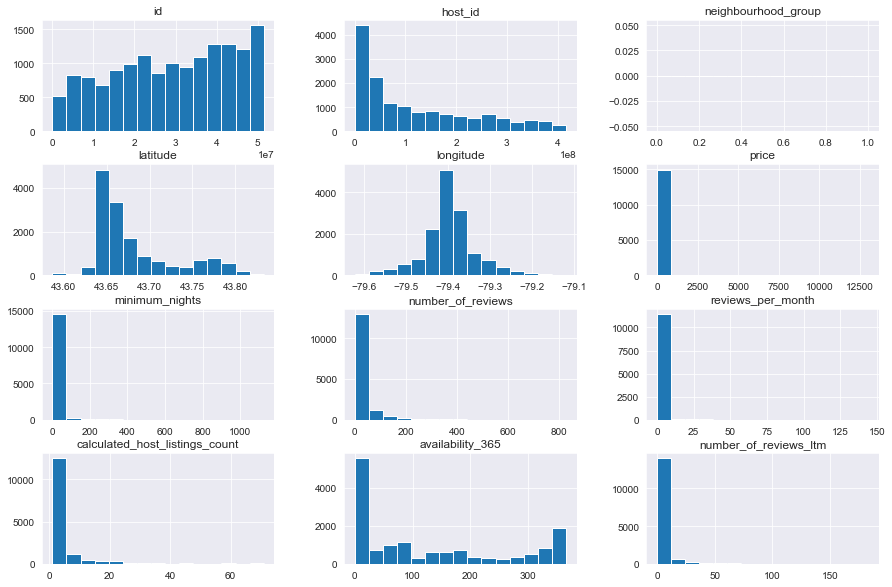

In [6]:
df.hist(bins=15, figsize=(15,10));

### Há *outliers* presentes?

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [7]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
    'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15084.000000,15084.000000,15084.000000,11609.000000,15084.000000,15084.000000,15084.000000
mean,156.388027,27.427208,25.836847,1.340099,4.329886,128.310130,3.277446
std,365.588100,39.637649,52.503578,3.584430,8.432275,134.544809,9.420179
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,65.000000,28.000000,1.000000,0.160000,1.000000,0.000000,0.000000
50%,100.000000,28.000000,5.000000,0.510000,1.000000,83.000000,0.000000
75%,168.000000,28.000000,26.000000,1.430000,4.000000,243.000000,2.000000
max,13000.000000,1125.000000,828.000000,144.000000,71.000000,365.000000,183.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 168, porém seu valor máximo é 13000.
* A quantidade mínima de noites (`minimum_nights`) está acima do limite real de 365 dias no ano.

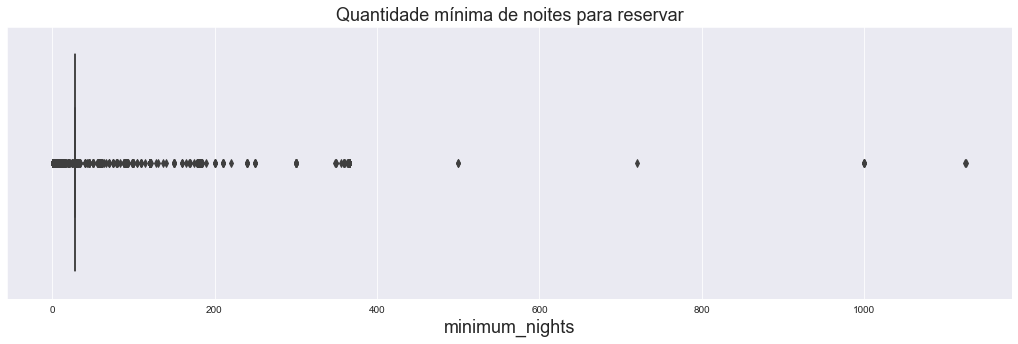

In [8]:
plt.figure(figsize=(18,5))
plt.title('Quantidade mínima de noites para reservar', fontsize=18)
plt.xlabel('',fontsize=18)

sns.boxplot(x='minimum_nights', data=df)

plt.show()

#### Quantidade de valores acima de 30 dias para minimum_nights

In [9]:
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

728 entradas
4.8263%


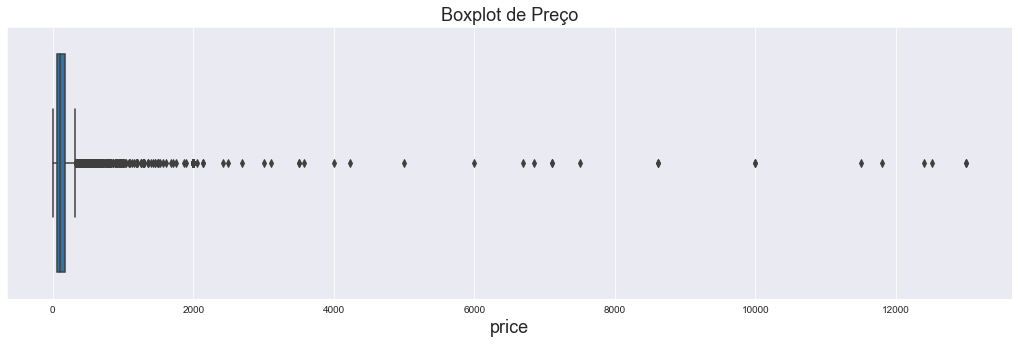

In [32]:
plt.figure(figsize=(18,5))
plt.title('Boxplot de Preço', fontsize=18)
plt.xlabel('',fontsize=18)

sns.boxplot(x='price', data=df)

plt.show()

#### Quantidade de valores acima de 500 para price

In [42]:
print("{} entradas".format(len(df[df.price > 500])))
print("{:.4f}%".format((len(df[df.price > 500]) / df.shape[0])*100))

378 entradas
2.5060%


### Histrogramas sem *outliers*
Já que identificamos outliers nas variáveis price e minimum_nights, vamos agora limpar o DataFrame delas e plotar novamente o histograma.

#### remover os *outliers* em um novo DataFrame

In [43]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

#### remover `neighbourhood_group`, pois está vazio

In [44]:
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#### plotar o histograma para as variáveis numéricas

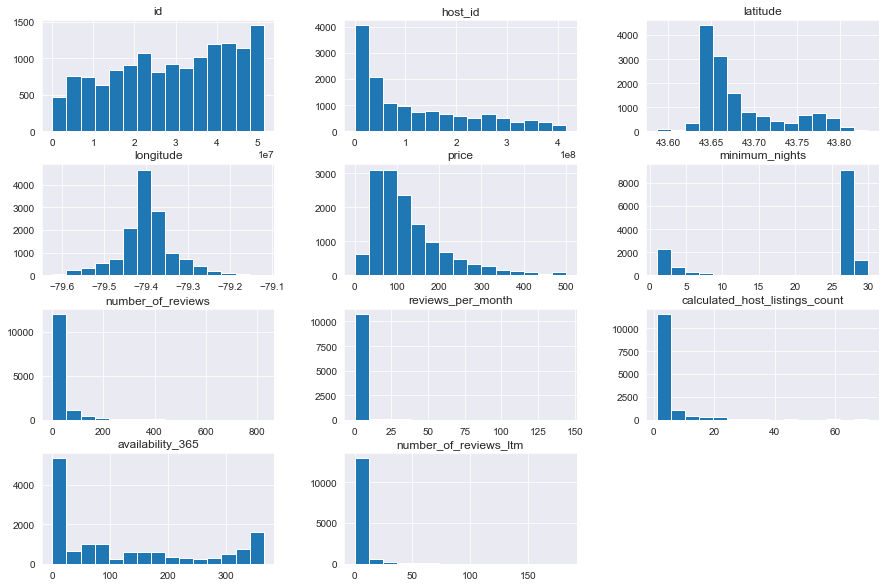

In [45]:
df_clean.hist(bins=15, figsize=(15,10));

#### Boxplot de quantidade mínima de noites para reservar (filtrando para no máximo 30 noites)

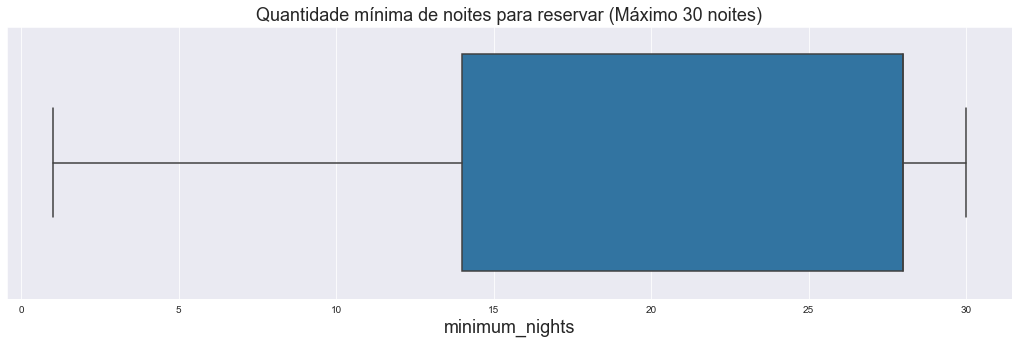

In [51]:
plt.figure(figsize=(18,5))
plt.title('Quantidade mínima de noites para reservar (Máximo 30 noites)', fontsize=18)
plt.xlabel('',fontsize=18)

sns.boxplot(x='minimum_nights', data=df_clean)

plt.show()

#### Boxplot de preço da propriedade (filtrando no máximo 500)

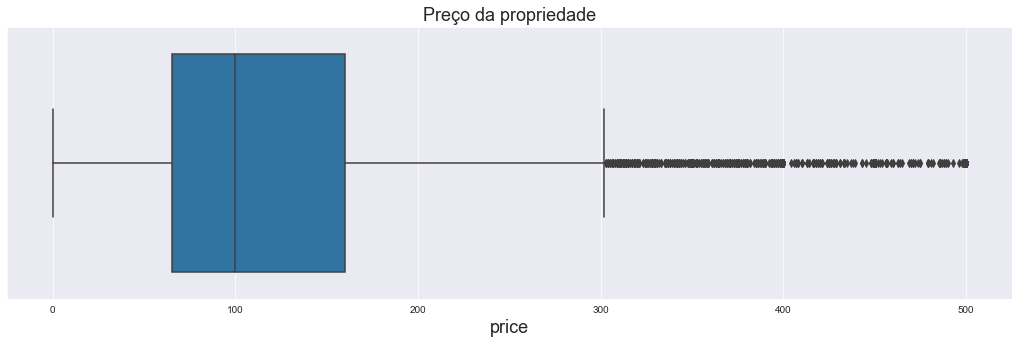

In [50]:
plt.figure(figsize=(18,5))
plt.title('Preço da propriedade', fontsize=18)
plt.xlabel('',fontsize=18)

sns.boxplot(x='price', data=df_clean)

plt.show()

### Qual a correlação existente entre as variáveis
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [52]:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
                 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.120284,0.014113,0.068836,0.095084,0.048770
minimum_nights,-0.120284,1.000000,-0.204037,-0.268540,0.008801,-0.110836
number_of_reviews,0.014113,-0.204037,1.000000,0.334364,-0.065142,0.036905
reviews_per_month,0.068836,-0.268540,0.334364,1.000000,-0.033257,0.017394
calculated_host_listings_count,0.095084,0.008801,-0.065142,-0.033257,1.000000,0.141058
availability_365,0.048770,-0.110836,0.036905,0.017394,0.141058,1.000000


In [ ]:
PRGn

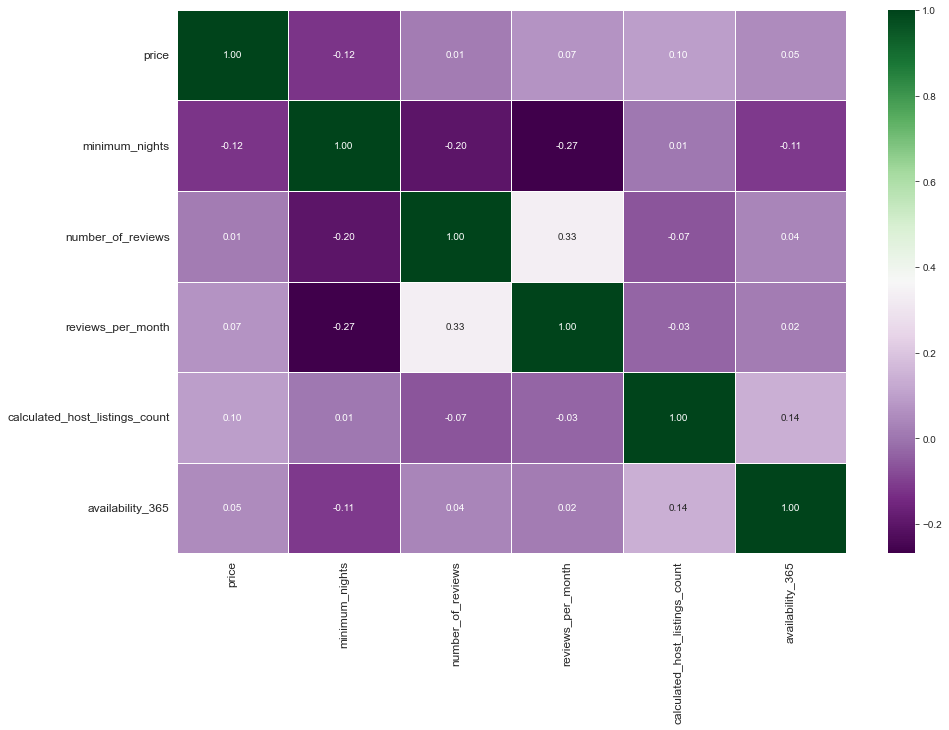

In [66]:
plt.figure(figsize=(15,10))

sns.heatmap(corr, annot=True, cmap="PRGn", linewidths=.5, fmt='.2f')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Qual o tipo de imóvel mais alugado no Airbnb?
A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`

In [67]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    8964
Private room       4812
Shared room         178
Hotel room           43
Name: room_type, dtype: int64

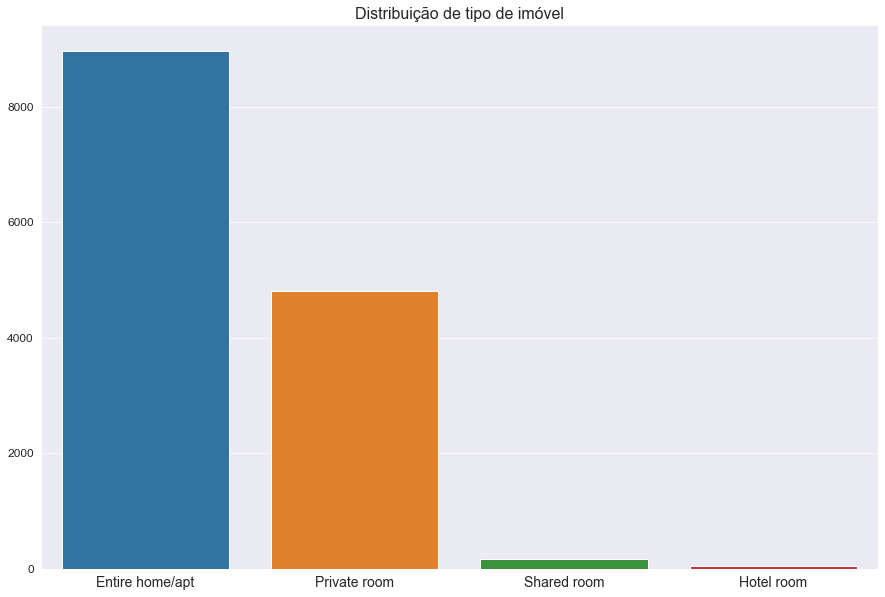

In [79]:
plt.figure(figsize=(15,10))
sns.barplot(x=df_clean.room_type.value_counts().index,
           y=df_clean.room_type.value_counts().values)

plt.title('Distribuição de tipo de imóvel', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)

plt.show()

#### mostrar a porcentagem de cada tipo de imóvel disponível

In [70]:
round((df_clean.room_type.value_counts() / df_clean.shape[0]) * 100, 2)

Entire home/apt    64.04
Private room       34.38
Shared room         1.27
Hotel room          0.31
Name: room_type, dtype: float64

### Qual a localidade mais cara de Toronto?

Uma maneira de se verificar uma variável em função da outra é usando groupby(). No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.

In [81]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False).head(10)

neighbourhood
Waterfront Communities-The Island    186.052211
Bay Street Corridor                  170.031026
Niagara                              157.226549
Bridle Path-Sunnybrook-York Mills    156.750000
The Beaches                          153.750000
Etobicoke West Mall                  145.346154
Woodbine Corridor                    143.434211
South Riverdale                      143.201521
Centennial Scarborough               142.714286
Casa Loma                            141.830508
Name: price, dtype: float64

#### plotar os imóveis pela longitude-latitude

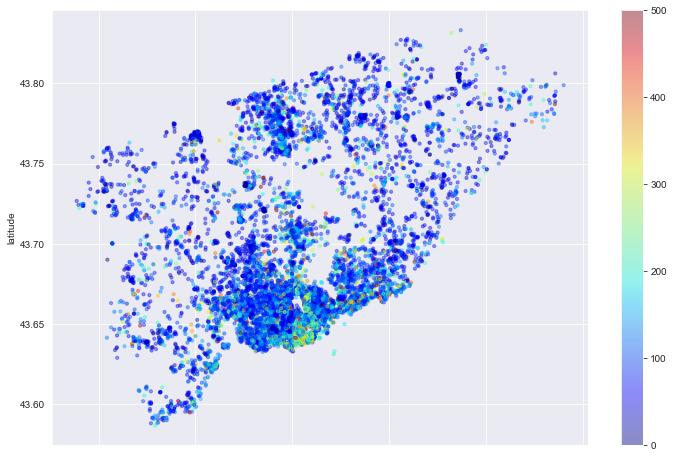

In [86]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=10,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos.